In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px

In [4]:
df = pd.read_csv('Screen Time Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  28 non-null     int64 
 1   Date                   28 non-null     object
 2   Week Day               28 non-null     object
 3   Total Screen Time      28 non-null     int64 
 4   Social Networking      28 non-null     int64 
 5   Reading and Reference  28 non-null     int64 
 6   Other                  28 non-null     int64 
 7   Productivity           28 non-null     int64 
 8   Health and Fitness     28 non-null     int64 
 9   Entertainment          28 non-null     int64 
 10  Creativity             28 non-null     int64 
 11  Yoga                   28 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 2.8+ KB


In [6]:
df.describe()

,index,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,13.500000,113.250000,60.714286,8.714286,14.821429,9.071429,1.285714,1.821429,0.214286,0.571429
std,8.225975,43.562322,22.853571,9.340700,13.754605,6.097532,3.952094,6.188721,0.568112,0.503953
min,0.000000,52.000000,25.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,83.500000,41.750000,2.000000,4.750000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,13.500000,111.000000,58.000000,5.000000,9.000000,8.000000,0.000000,0.000000,0.000000,1.000000
75%,20.250000,137.250000,76.500000,13.500000,21.500000,15.000000,0.000000,1.000000,0.000000,1.000000
max,27.000000,198.000000,109.000000,40.000000,43.000000,22.000000,15.000000,32.000000,2.000000,1.000000


In [7]:
df.isnull().sum()

index                    0
Date                     0
Week Day                 0
Total Screen Time        0
Social Networking        0
Reading and Reference    0
Other                    0
Productivity             0
Health and Fitness       0
Entertainment            0
Creativity               0
Yoga                     0
dtype: int64

In [8]:
df.columns

Index(['index', 'Date', 'Week Day', 'Total Screen Time ', 'Social Networking',
       'Reading and Reference', 'Other', 'Productivity', 'Health and Fitness',
       'Entertainment', 'Creativity', 'Yoga'],
      dtype='object')

In [9]:
df.dtypes

index                     int64
Date                     object
Week Day                 object
Total Screen Time         int64
Social Networking         int64
Reading and Reference     int64
Other                     int64
Productivity              int64
Health and Fitness        int64
Entertainment             int64
Creativity                int64
Yoga                      int64
dtype: object

In [10]:
df.rename(columns={"Week Day": "Week_Day", "Total Screen Time ": "Total_Screen_Time",
                   "Social Networking": "Social_Networking", "Reading and Reference": "Reading_and_Reference", "Health and Fitness": "Health_and_Fitness"}, inplace=True)

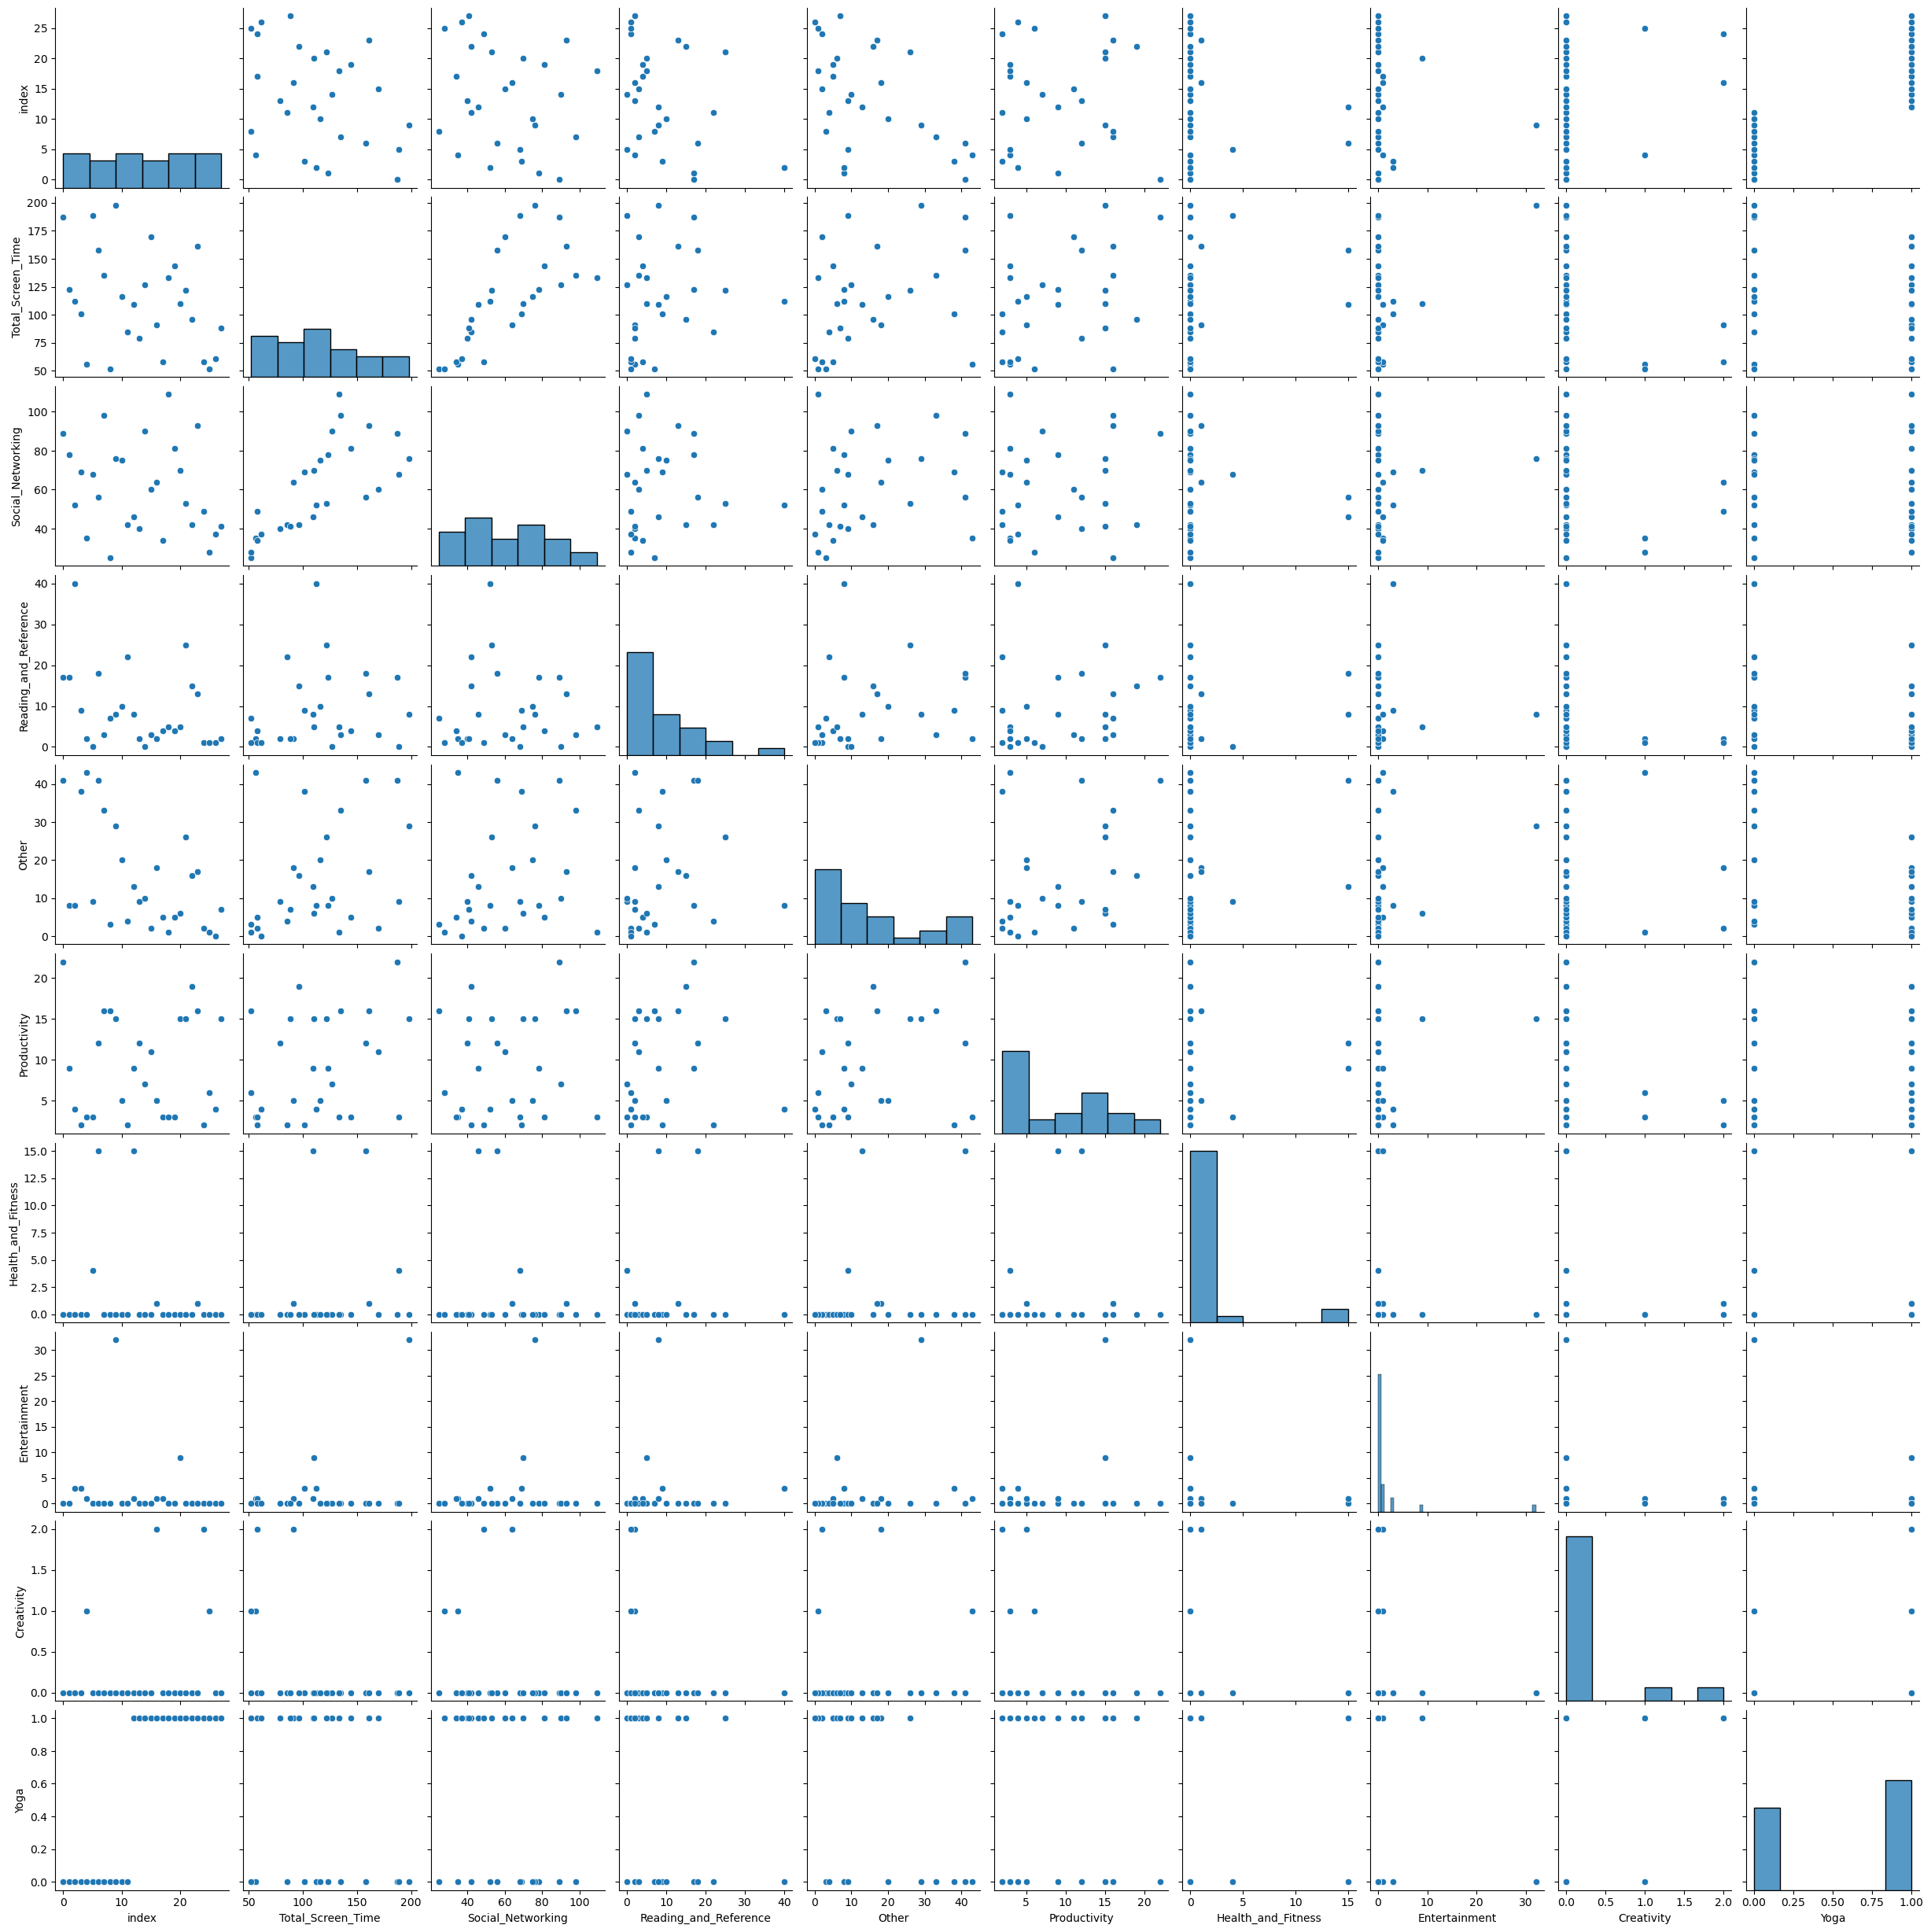

In [11]:
sns.pairplot(df)
plt.show()

In [14]:
fig = px.bar(df, x="Week_Day", y="Total_Screen_Time", color="Week_Day", title="total screen time by week day")
fig.show()

In [15]:
df.groupby('Week_Day')['Total_Screen_Time'].sum() 

Week_Day
Friday       562
Monday       503
Saturday     333
Sunday       326
Thursday     441
Tuesday      435
Wednesday    571
Name: Total_Screen_Time, dtype: int64

In [17]:
df.groupby('Yoga')['Total_Screen_Time'].sum()

Yoga
0    1512
1    1659
Name: Total_Screen_Time, dtype: int64

In [21]:
df.groupby('Health_and_Fitness')['Total_Screen_Time'].sum()

Health_and_Fitness
0     2463
1      252
4      189
15     267
Name: Total_Screen_Time, dtype: int64

In [23]:
fig = px.histogram(df,x="Week_Day",y="Productivity",color="Week_Day")
fig.show()

In [25]:
fig = px.histogram(df,x="Week_Day",y="Social_Networking",color="Week_Day")
fig.show()

/var/folders/z7/vg64cvbj5jz8n8t6rtyrfgqm0000gn/T/ipykernel_30475/1583065573.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



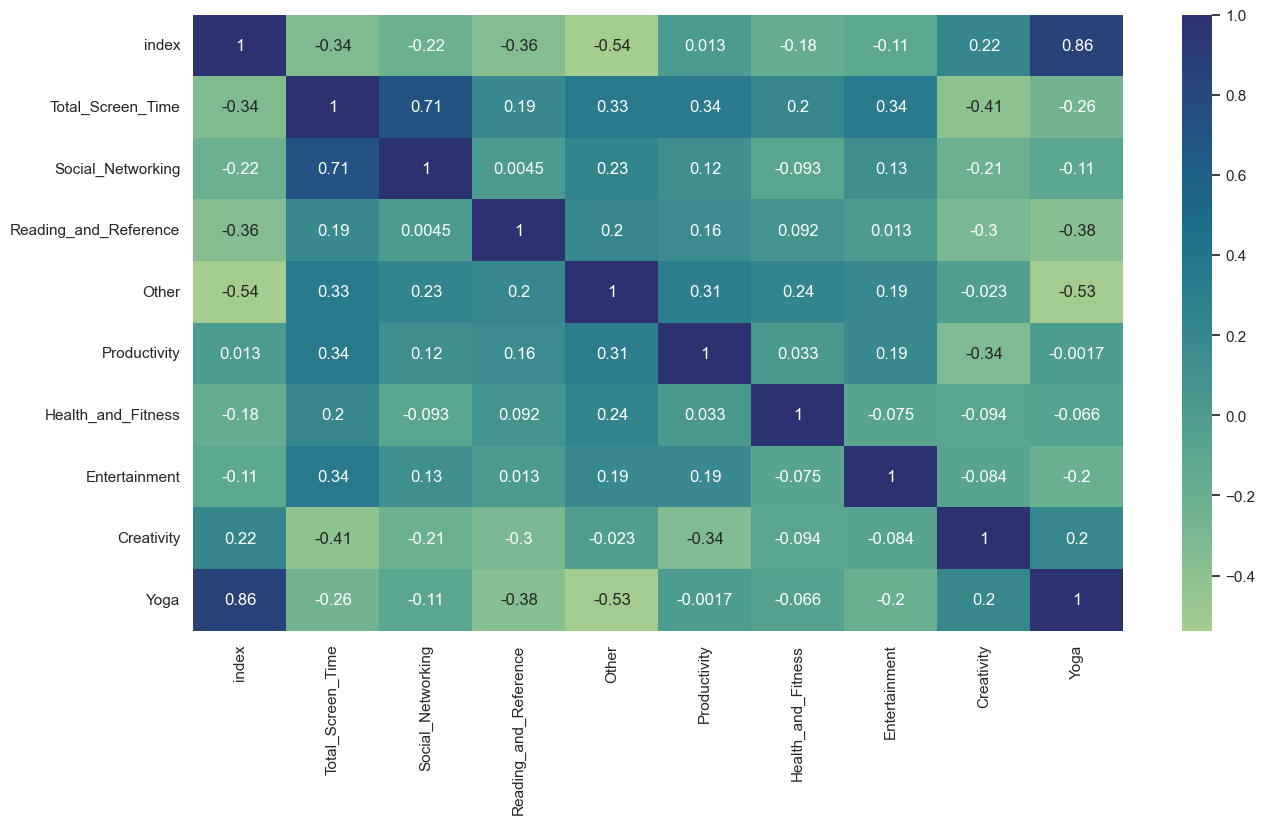

In [26]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="crest")
plt.show()

In [35]:
fig = px.bar(df, x='Week_Day', y='Productivity',
             hover_data=['Week_Day', 'Yoga'], color='Week_Day',
             labels={'Days':'Week_Day'}, height=400)
fig.show()

In [ ]:
## Above you will see the correlation of screen time and yoga activity. 
# You will see that social activity directly impacts screen time. 
# Fridays tend to be focused on entertainment.
# Productivity is increased during the week while entertainment and screen time are increased during the weekends.
# Yoga impacts productivity slightly. 